# Analyzing @LADOTofficial tweets

In [1]:
import pandas as pd
import numpy as np
import requests
from requests import get
import matplotlib.pyplot as plt
import json
import spacy
import seaborn as sns

import env

### Notes:

Hootsuite: https://www.youtube.com/watch?v=Ztk6PXD1EjU

# Twitter API

## Wrangle

In [2]:
url = "https://api.twitter.com/2/users/61261275/tweets?user.fields=created_at,description,entities,id,location,name,pinned_tweet_id,profile_image_url,protected,public_metrics,url,username,verified&max_results=100&start_time=2020-09-30T00:00:00Z&end_time=2020-10-15T00:00:00Z&expansions=&tweet.fields=created_at,public_metrics,source,text"

payload = {}
headers = {"Authorization": "Bearer {}".format(env.bearer_token)}

response = requests.request("GET", url, headers=headers)
response.status_code

200

In [3]:
tweets = json.loads(response.text.encode('utf8'))['data']

tweets[1]

{'created_at': '2020-10-14T19:35:15.000Z',
 'id': '1316462593825894400',
 'source': 'Twitter Web App',
 'public_metrics': {'retweet_count': 14,
  'reply_count': 22,
  'like_count': 8,
  'quote_count': 12},
 'text': '#LADOT has introduced economic relief measures to assist #Angelenos in need as parking enforcement resumes this Thursday, October 15. For more information, visit: https://t.co/GG2HFz3xyT https://t.co/jEk7nl7CVU'}

In [4]:
data = pd.DataFrame()

for tweet in tweets:
    tweet_data = pd.DataFrame({'post_time': pd.to_datetime(tweet['created_at']),
                               'tweet': tweet['text'].lower(),
                               'retweet_count': tweet['public_metrics']['retweet_count'],
                               'reply_count': tweet['public_metrics']['reply_count'],
                               'like_count': tweet['public_metrics']['like_count'],
                               'quote_count': tweet['public_metrics']['quote_count'],
                               'tweet_url_id': tweet['id']
                               },index=[0])
    data = pd.concat([data, tweet_data])

data = data.sort_values(by=['post_time']).reset_index(drop=True)
data = data.assign(
    total_engagement = data[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum(axis=1)
)

In [5]:
data

,post_time,tweet,retweet_count,reply_count,like_count,quote_count,tweet_url_id,total_engagement
0,2020-09-30 16:02:18+00:00,a new bus-only lane is making its debut in #do...,27,9,111,8,1311335571097300996,155
1,2020-10-01 16:57:29+00:00,"rt @bicyclecomfort: rt bikeleague: ""so not eve...",2,0,0,0,1311711846198464512,2
2,2020-10-01 18:22:26+00:00,@manupag @manupag hello. thank you for your qu...,0,1,0,0,1311733227665715201,1
3,2020-10-01 20:26:56+00:00,@ahmong hello. thank you for reaching out. lad...,0,1,0,0,1311764556998344704,1
4,2020-10-01 20:27:46+00:00,"@hermy15 @mayorofla hello @hermy15, thank you ...",0,0,0,0,1311764768244498433,0
5,2020-10-01 20:28:52+00:00,@evirybody hello. thank you for reaching out. ...,0,0,0,0,1311765042245898241,0
6,2020-10-01 21:18:04+00:00,@mslara85 @mslara85 hello. thank you for reach...,0,1,0,0,1311777424582021120,1
7,2020-10-01 21:18:05+00:00,@iamreadavis @iamreadavis hello. thank you for...,0,0,1,0,1311777430600921099,1
8,2020-10-01 21:18:07+00:00,@reb12588 @reb12588 hello. thank you for reach...,0,1,0,0,1311777439266361344,1
9,2020-10-01 21:18:09+00:00,@lourdesco17 @lourdesco17 hello. thank you for...,0,1,0,0,1311777445025021953,1


In [6]:
print(data.tweet[0])

a new bus-only lane is making its debut in #dowtownla! over the weekend, our crew was installing a dedicated bus line at alison st,  to enhance mobility for the thousands of people who ride transit or drive in the area. @metrolosangeles #ladot #movinglaforward https://t.co/hmqcsyzel2


## Explore

In [7]:
non_enforcement_tweets = data.loc[~data.tweet.str.contains('enforcement')]
enforcement_tweets = data.loc[data.tweet.str.contains('enforcement')]

non_enforcement_metrics = non_enforcement_tweets[['post_time', 'total_engagement']]
enforcement_metrics = enforcement_tweets[['post_time', 'total_engagement']]

non_enforcement_metrics.set_index('post_time', inplace=True)
enforcement_metrics.set_index('post_time', inplace=True)

Number of enforcement tweets: 31


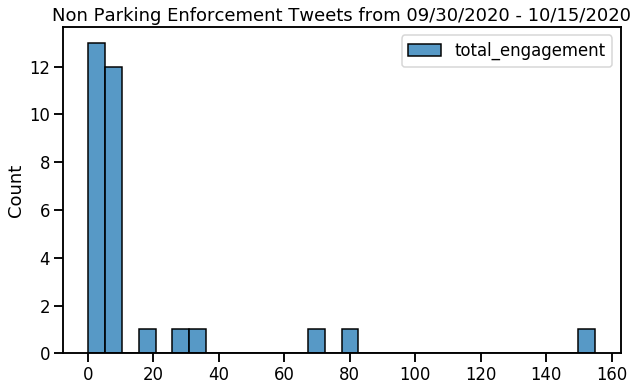

In [8]:
sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.histplot(non_enforcement_metrics, bins=30)

plt.title("Non Parking Enforcement Tweets from 09/30/2020 - 10/15/2020")
print(f"Number of enforcement tweets: {len(non_enforcement_metrics)}");

Number of enforcement tweets: 15


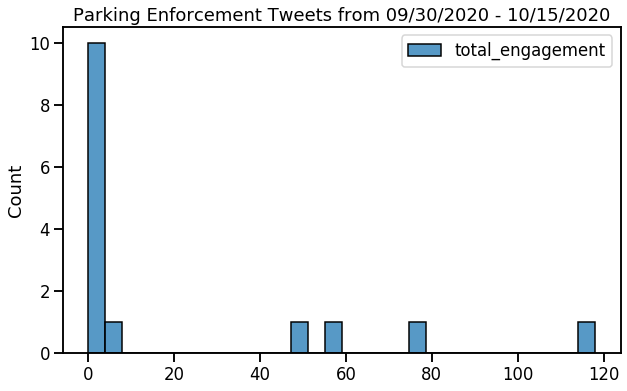

In [9]:
sns.set_context('talk')

plt.figure(figsize=(10, 6))
sns.histplot(enforcement_metrics, bins=30)
plt.title("Parking Enforcement Tweets from 09/30/2020 - 10/15/2020")
print(f"Number of enforcement tweets: {len(enforcement_metrics)}");